In [2]:
#import packages and record dataset
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data_path = '../../data/cleaned_riot_data/league_combined_with_chall_cleaned.csv'
combined_league_ranks = pd.read_csv(data_path, index_col=None)

In [3]:
"""
Same cleaning step as before.
"""

#normalize time-dependent features
#do this for variables: kills, deaths, dmgObj, dmgTurr, vision_score, totalDmg, 
#totalDmgTaken, totalMinions, and gold
combined_league_ranks['kills/min'] = combined_league_ranks['kills']/combined_league_ranks['time']
combined_league_ranks['deaths/min'] = combined_league_ranks['deaths']/combined_league_ranks['time']
combined_league_ranks['dmgObj/min'] = combined_league_ranks['dmgObj']/combined_league_ranks['time']
combined_league_ranks['dmgTurr/min'] = combined_league_ranks['dmgTurr']/combined_league_ranks['time']
combined_league_ranks['vision_score/min'] = combined_league_ranks['vision_score']/combined_league_ranks['time']
combined_league_ranks['dmg/min'] = combined_league_ranks['totalDmg']/combined_league_ranks['time']
combined_league_ranks['dmgTaken/min'] = combined_league_ranks['totalDmgTaken']/combined_league_ranks['time']
combined_league_ranks['minions/min'] = combined_league_ranks['totalMinions']/combined_league_ranks['time']
combined_league_ranks['gold/min'] = combined_league_ranks['gold']/combined_league_ranks['time']


#remove the time-dependent columns
combined_league_ranks = combined_league_ranks.drop('kills', axis=1)
combined_league_ranks = combined_league_ranks.drop('deaths', axis=1)
combined_league_ranks = combined_league_ranks.drop('dmgObj', axis=1)
combined_league_ranks = combined_league_ranks.drop('dmgTurr', axis=1)
combined_league_ranks = combined_league_ranks.drop('vision_score', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalDmg', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalDmgTaken', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalMinions', axis=1)
combined_league_ranks = combined_league_ranks.drop('gold', axis=1)

#remove non-numerical columns and time columns
combined_league_ranks = combined_league_ranks.drop('time', axis=1)
combined_league_ranks = combined_league_ranks.drop('position', axis=1)
combined_league_ranks = combined_league_ranks.drop('win', axis=1)

#remove temporarily the class label column "rank" to add to later
rank_col = combined_league_ranks.pop("rank")

In [4]:
"""
Subsetting the dataset with features 5 and 8 again as found in feature selection.
"""
subset_combined = combined_league_ranks[['vision_score/min', 'minions/min']]

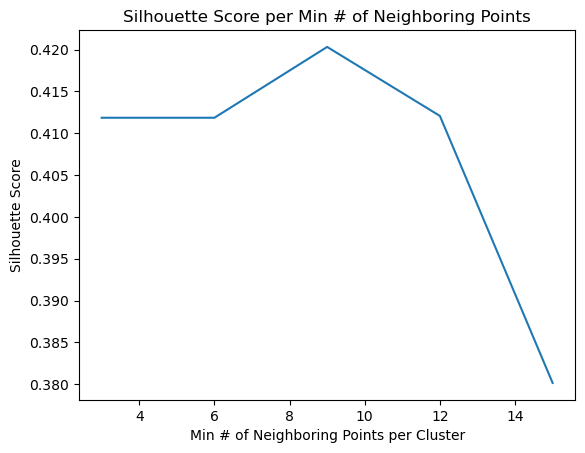

In [10]:
"""
As mentioned before, the use of different number of data points within a cluster
can help determine optimal clustering of the dataset.
Using a subset of my dataset again with features 5 and 8.
"""

#use different density parameters for DBSCAN
density = [3,6,9,12,15]
#will fill this list with silhouette scores of each density
sil = []

for num in density:
    #define DBSCAN model and fit/predict the clusters
    current_dbscan = DBSCAN(min_samples=num)
    db_predict = current_dbscan.fit_predict(subset_combined)

    #calculate silhouette score based on cluster predictions
    sil.append(silhouette_score(subset_combined, db_predict))

#plot the silhouette score per minimum num of neighboring points per cluster
plt.plot(density, sil)
plt.xlabel('Min # of Neighboring Points per Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per Min # of Neighboring Points')

#save as .png
plt.savefig('dbscan_sil.png', bbox_inches='tight')


plt.show()

#the highest silhouette score found is at aroun 9 minimum neighboring data points
#per cluster for DBSCAN.

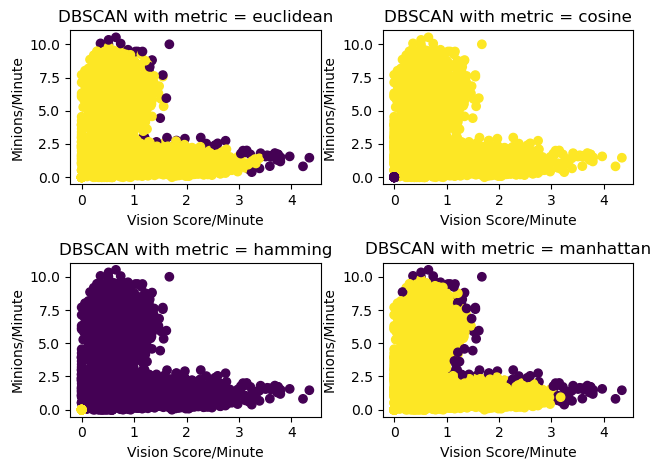

In [23]:
"""
Knowing the best number of minimum neighboring points (9) to determine clusters for 
DBSCAN for the subset dataset, now visualize the predicted clustering.

Also experiment with different distance metrics for DBSCAN for different data point
distance calculations.
"""

#use 9 minimum neighboring points
#i used 0.25 eps because it seemed to show outliers better
#also try different distance metrics: euclidean, cosine, hamming, and manhattan
metrics = ['euclidean', 'cosine', 'hamming', 'manhattan']
count = 0
for metric in metrics:
    #count of subplot
    count += 1
    #set DBSCAN with parameters
    dbscan = DBSCAN(eps=0.25, min_samples=9, metric=metric)
    #fit/transform with record dataset
    dbscan_9_predict = dbscan.fit_predict(subset_combined)

    #now we should have a 2 dimensional representation of original dataset
    #plot the TSNE transformation with class labels for coloring
    plt.subplot(2,2,count)
    plt.scatter(subset_combined['vision_score/min'], subset_combined['minions/min'], c=dbscan_9_predict)
    #labels
    plt.title(f'DBSCAN with metric = {metric}')
    plt.xlabel('Vision Score/Minute')
    plt.ylabel('Minions/Minute')

plt.tight_layout()

#save as .png
plt.savefig('dbscan_cluster_metrics.png', bbox_inches='tight')

plt.show()